In [ ]:
import pandas as pd

In [ ]:
data=pd.read_excel('data anticorps.xlsx')

In [ ]:
data

,individu,jour,MDA FLUNPS,MDA FLUH9S
0,individu 1,1,11649,18811
1,individu 1,7,5006,12107
2,individu 1,14,5006,7452
3,individu 1,21,3174,2640
4,individu 1,28,2775,1038
...,...,...,...,...
135,individu 20,14,127,300
136,individu 20,21,478,151
137,individu 20,28,136,52
138,individu 20,35,40,1


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


a1 = 13625.854121665714 , k1 = 0.28738947824622907 , c1 = 595.9708514827894


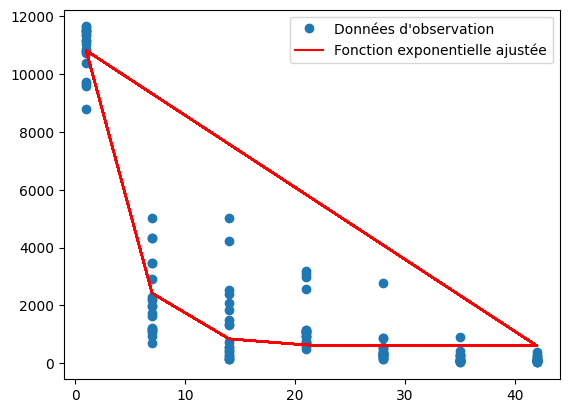

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
# Définir la fonction exponentielle
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Entrer les données d'observation
x_data = data['jour']
y_data = data['MDA FLUNPS'] # Niveau d'anticorps observé

# Utiliser la méthode des moindres carrés pour ajuster la courbe
popt, pcov = curve_fit(exp_func, x_data, y_data)

# Afficher les paramètres a, b et c de la fonction ajustée
print('a1 =', popt[0], ', k1 =', popt[1], ', c1 =', popt[2])

# Plot des données d'observation et de la fonction ajustée
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'o', label='Données d\'observation')
plt.plot(x_data, exp_func(x_data, *popt), 'r-', label='Fonction exponentielle ajustée')
plt.legend()
plt.show()

In [ ]:
k1=popt[1]
c1=popt[2]

In [ ]:
g  = data.groupby('jour')
data1=g.get_group(1)
data1

,individu,jour,MDA FLUNPS,MDA FLUH9S
0,individu 1,1,11649,18811
7,individu 2,1,11642,18393
14,individu 3,1,11543,17874
21,individu 4,1,11529,17827
28,individu 5,1,11487,17687
35,individu 6,1,11465,17656
42,individu 7,1,11371,16549
49,individu 8,1,11339,16174
56,individu 9,1,11191,16159
63,individu 10,1,11141,16058


In [ ]:
#la degradation des anticorps
def A(t, A_0 ):
    return A_0 * np.exp(-k * t) + c


In [ ]:
#on considère le cutt-off comme titre seuil 668 pour le Kit FLUNPS
#on doit determiner le temps dans lequel le nombre des anticorps arrive à cette seuil

def temps_pour_arriver_seuil(A_0, k1, c1 ):
    t = -(1/k1) * np.log((668 - c1) / A_0)
    return t

In [ ]:
ageMDAFLUNPS=[]
for i in data1 ["MDA FLUNPS"]:
  ageMDAFLUNPS.append(temps_pour_arriver_seuil(i,k1, c1 ) )
print(ageMDAFLUNPS)

[17.696906552839163, 17.69481499899466, 17.665099032116245, 17.660876217873483, 17.648176939146158, 17.641506392732637, 17.612860035470284, 17.603054027017645, 17.557338271402692, 17.541757023313735, 17.505653137489503, 17.45991008459842, 17.432301722050166, 17.430044859375464, 17.408044535168457, 17.300930947424355, 17.066620405963903, 17.04435204883543, 17.02484023036816, 16.712278479889484]


In [ ]:
MDAFLUNS_j1=[]
for i in data1["MDA FLUNPS"]:
  MDAFLUNS_j1.append(i)
print(MDAFLUNS_j1)

[11649, 11642, 11543, 11529, 11487, 11465, 11371, 11339, 11191, 11141, 11026, 10882, 10796, 10789, 10721, 10396, 9719, 9657, 9603, 8778]


In [ ]:
df = pd.DataFrame({ 'MDAFLUNS_j1':MDAFLUNS_j1,
                   'ageMDAFLUNPS':ageMDAFLUNPS})
df

,MDAFLUNS_j1,ageMDAFLUNPS
0,11649,17.696907
1,11642,17.694815
2,11543,17.665099
3,11529,17.660876
4,11487,17.648177
5,11465,17.641506
6,11371,17.612860
7,11339,17.603054
8,11191,17.557338
9,11141,17.541757


In [ ]:
mean_jour_FLUNPS = df['ageMDAFLUNPS'].mean()
print("the mean of days to arrive to the cutt_of:",mean_jour_FLUNPS)
max=df['ageMDAFLUNPS'].max()
print('the max of days to arrive to the cutt_off:',max)

the mean of days to arrive to the cutt_of: 17.435368297103505
the max of days to arrive to the cutt_off: 17.696906552839163


In [ ]:
df['ageMDAFLUNPS'].max()

17.696906552839163

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


a = 19235.81138992403 , k = 0.2381746628212005 , c = 553.8381411975748


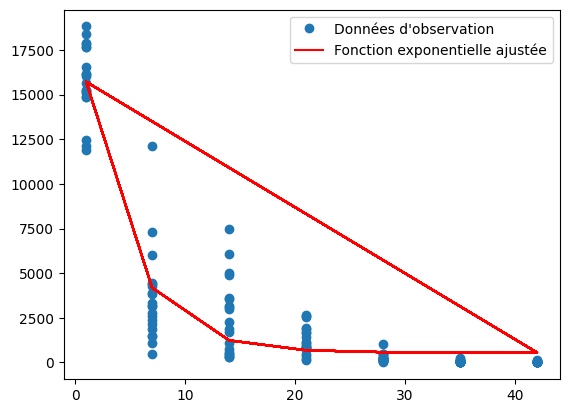

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
# Définir la fonction exponentielle
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Entrer les données d'observation
x_data = data['jour']
y_data = data['MDA FLUH9S'] # Niveau d'anticorps observé

# Utiliser la méthode des moindres carrés pour ajuster la courbe
pop , pcov = curve_fit(exp_func, x_data, y_data)

# Afficher les paramètres a, b et c de la fonction ajustée
print('a =', pop [0], ', k =', pop [1], ', c =', pop [2])

# Plot des données d'observation et de la fonction ajustée
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'o', label='Données d\'observation')
plt.plot(x_data, exp_func(x_data, *pop), 'r-', label='Fonction exponentielle ajustée')
plt.legend()
plt.show()

In [ ]:
k=pop[1]
c=pop[2]

In [ ]:
def temps_pour_arriver_cut_off(A_0, k, c,cut_off ):
    t = -(1/k) * np.log((cut_off - c) / A_0)
    return t

In [ ]:
##on considère le cutt-off comme titre seuil 732 pour le Kit FLUH9S
#on doit determiner le temps dans lequel le nombre des anticorps arrive à cette seuil

def temps_pour_arriver_seuilFLUH9S(A_0, k, c ):
    t = -(1/k) * np.log((732 - c) / A_0)
    return t



In [ ]:
ageMDAFLUH9S=[]
for i in data1 ["MDA FLUH9S"]:
  ageMDAFLUH9S.append(temps_pour_arriver_seuilFLUH9S(i,k, c ))
print(ageMDAFLUH9S)

[19.563393404966344, 19.469043958236604, 19.34886738634429, 19.337812553902047, 19.304709723300007, 19.297344382766124, 19.025485104576497, 18.929250424985987, 18.92535477684051, 18.89902954915529, 18.792314533027803, 18.677307015414886, 18.66460823703879, 18.662395827863612, 18.642431508258237, 18.577166265109913, 18.571516530805155, 17.83795515520627, 17.713246952922933, 17.644719702234255]


In [ ]:
MDAFLUH9S_j1=[]
for i in data1["MDA FLUH9S"]:
  MDAFLUH9S_j1.append(i)
print(MDAFLUH9S_j1)

[18811, 18393, 17874, 17827, 17687, 17656, 16549, 16174, 16159, 16058, 15655, 15232, 15186, 15178, 15106, 14873, 14853, 12472, 12107, 11911]


In [ ]:
df2 = pd.DataFrame({ 'MDAFLUH9S_j1':MDAFLUH9S_j1,
                   'ageMDAFLUH9S':ageMDAFLUH9S})
df2

,MDAFLUH9S_j1,ageMDAFLUH9S
0,18811,19.563393
1,18393,19.469044
2,17874,19.348867
3,17827,19.337813
4,17687,19.304710
5,17656,19.297344
6,16549,19.025485
7,16174,18.929250
8,16159,18.925355
9,16058,18.899030


In [ ]:
mean_jour_FLUH9S = df2['ageMDAFLUH9S'].mean()
print(mean_jour_FLUH9S)

18.794197649647778


In [ ]:
df2['ageMDAFLUH9S'].max()

19.563393404966344

In [ ]:
mean_jour_FLUH9S = df2['ageMDAFLUH9S'].mean()
print("the mean of days to arrive to the cutt_of:",mean_jour_FLUH9S)
max1=df2['ageMDAFLUH9S'].max()
print('the max of days to arrive to the cutt_off:',max1)

the mean of days to arrive to the cutt_of: 18.794197649647778
the max of days to arrive to the cutt_off: 19.563393404966344
